# Instalação e importação das dependências

In [1]:
!pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Análise exploratória dos dados

## (Arquivos 1 a 4)

In [49]:
df_producao = pd.read_csv('1- producao-de-plastico-global.csv')
df_residuo = pd.read_csv('2- participacao-despejo-residuo-plastico.csv')
df_destino = pd.read_csv('3- destino-plastico.csv')
df_desperdicio = pd.read_csv('4- desperdicio-plastico-per-capita.csv')
df_poluicao = pd.read_csv('5- poluicao-agua-cidades.csv')

df_residuo.sample()

,Entidade,Código,Ano,Participação na emissão global de plásticos para o oceano
88,Madagascar,MDG,2019,0.079125


In [47]:
#vou verificar a estrutura do csv
print(df_producao.head())

  Entidade   Ano  Produção Anual de Plástico
0    Mundo  1950                     2000000
1    Mundo  1951                     2000000
2    Mundo  1952                     2000000
3    Mundo  1953                     3000000
4    Mundo  1954                     3000000


In [24]:
#vou dropar as duplicatas
df_producao = df_producao.drop_duplicates()

## CSV 2 (participacao dos residuos de plastico para oceano)

In [50]:
df_residuo.head()

,Entidade,Código,Ano,Participação na emissão global de plásticos para o oceano
0,Africa,NaN,2019,7.989317
1,Albania,ALB,2019,0.159782
2,Algeria,DZA,2019,0.589510
3,Angola,AGO,2019,0.087804
4,Antigua and Barbuda,ATG,2019,0.000204


In [51]:
df_residuo["Entidade"] = df_residuo["Entidade"].str.lower()
df_residuo

,Entidade,Código,Ano,Participação na emissão global de plásticos para o oceano
0,africa,NaN,2019,7.989317
1,albania,ALB,2019,0.159782
2,algeria,DZA,2019,0.589510
3,angola,AGO,2019,0.087804
4,antigua and barbuda,ATG,2019,0.000204
...,...,...,...,...
165,venezuela,VEN,2019,0.611359
166,vietnam,VNM,2019,2.881287
167,western sahara,ESH,2019,0.003880
168,yemen,YEM,2019,0.025729


In [52]:
df_residuo = df.drop_duplicates()

# Gerar os graficos

## Grafico da Producao Anual de plastico ao longo dos anos (CSV 1)

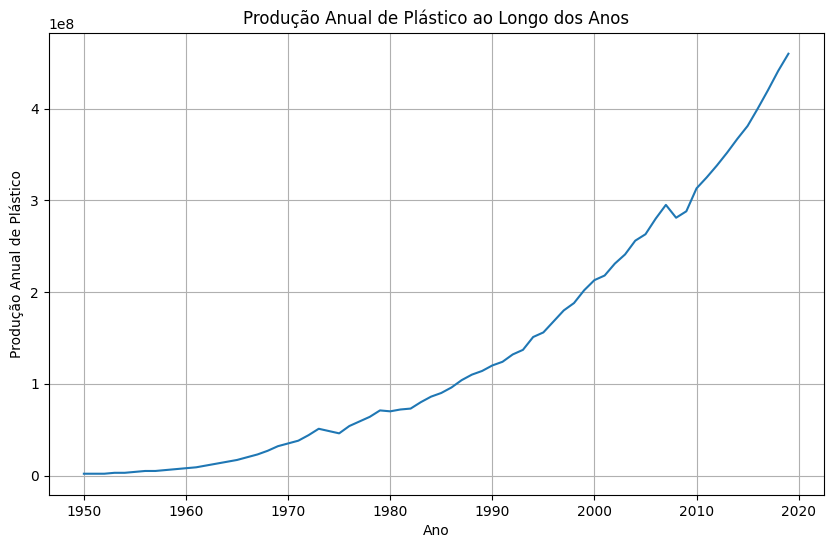

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(df_producao['Ano'], df_producao['Produção Anual de Plástico'])
plt.title('Produção Anual de Plástico ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Produção Anual de Plástico')
plt.grid(True)
plt.show()